# **Single Linear Regression**

Linear regression is a powerful modeling technique that can be used to understand the relationship between a quantitative variable and one or more other variables, sometimes with the goal of making predictions. 

Like the name implies, LINEar regression involves fitting a line to a set of data points. In order to fit a line, it’s helpful to understand the equation for a line, which is often written as $y=mx+b$.


In [229]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import CREDIT_RISK_DATA_DIR

In [230]:
os.chdir(CREDIT_RISK_DATA_DIR)

df = pd.read_csv("credit_risk_dataset.csv")
x = "person_income"
Y = "loan_amnt"


In order to actually choose a line, we need to come up with some criteria for what “best” actually means. Depending on our ultimate goals and data, we might choose different criteria; however, a common choice for linear regression is ordinary least squares (OLS). In simple OLS regression, we assume that the relationship between two variables x and y can be modeled as:

$y=mx+b+\epsilon$

We define “best” as the line that minimizes the total squared error for all data points. This total squared error is called the loss function in machine learning. Notice that we square each individual distance so that points below and above the line contribute equally to loss (when we square a negative number, the result is positive). To find the best-fit line, we need to find the slope and intercept of the line that minimizes loss.


## **Gradient Descent**

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom. The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

Gradient descent can be used for much more than just linear regression. In fact, it can be used to train any machine learning algorithm as long as the ML algorithm has a loss function that is a differentiable function of the ML algorithm’s parameters. In more intuitive terms, gradient descent can be used whenever the loss function looks like smooth terrain with hills and valleys (even if those hills and valleys live in a space with more than 3 dimensions).

Gradient descent (or variations of it) can be used to find parameters in logistic regression models, support vector machines, neural networks, and other ML models. Gradient descent’s flexibility makes it an essential part of machine learning.

We can scale the size of the step by multiplying the gradient by a learning rate. How do we know when we should stop changing the parameters m and b? How will we know when our program has learned enough?



### **Convergence**

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters `m` and `b`.

### **Learning Rate**
We want our program to be able to iteratively learn what the best `m` and `b` values are. So for each `m` and `b` pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go. A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge!

## **Model Fitting**

There are a number of Python libraries that can be used to fit a linear regression, but in this example, we will use the `OLS.from_formula()` function from `statsmodels.api` because it uses simple syntax and provides comprehensive model summaries.

### **statsmodels.api.OLS**

In [ ]:
import statsmodels.api as sm

model = sm.OLS.from_formula(f"{Y} ~ {x} ", data=df)

Then, we can fit the model using `.fit()`:

In [232]:
results = model.fit()

Finally, we can inspect a summary of the results using `print(results.summary())`. 

In [233]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loan_amnt   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2497.
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:14:23   Log-Likelihood:            -3.3017e+05
No. Observations:               32581   AIC:                         6.603e+05
Df Residuals:                   32579   BIC:                         6.604e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7791.1565     49.339    157.910      0.000    7694.450    7887.863
person_income     0.0272      0.001     49.972      0.000       0.026       0.028
==============================================================================
Omnibus:                     8280.890   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           477655.243
Skew:                           0.333   Prob(JB):                         0.00
Kurtosis:                      21.746   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For now, we’ll only look at the coefficients using `results.params`, but the full summary table is useful because it contains other important diagnostic information.

In [234]:
results.params

Intercept        7791.156493
person_income       0.027215
dtype: float64

In Python, we can calculate this by plugging in values or by accessing the intercept and slope from `results.params` using their indices (0 and 1, respectively):

In [235]:
print(results.params.iloc[0] + results.params.iloc[1] * 25)

7791.836863167715


We can also do this calculation using the `.predict()` method on the fitted model.

In [236]:
results.predict({x: [1000]})

0    7818.371305
dtype: float64

Again consider our regression model to predict weight based on height (model formula `'weight ~ height'`). The fitted values are the predicted weights for each person in the dataset that was used to fit the model, while the residuals are the differences between the predicted weight and the true weight for each person. We can calculate the fitted values using `.predict()` by passing in the original data. The result is a pandas series containing predicted values for each person in the original dataset:

In [237]:
fitted_values = results.predict(df[x])
print(fitted_values.head())

0    9396.830431
1    8052.418693
2    8052.418693
3    9573.726713
4    9271.642294
dtype: float64


The residuals are the differences between each of these fitted values and the true values of the outcome variable. They can be calculated by subtracting the fitted values from the actual values. We can perform this element-wise subtraction in Python by simply subtracting one python series from the other, as shown below:

In [238]:
residuals = df[Y] - fitted_values
print(residuals.head())

0    25603.169569
1    -7052.418693
2    -2552.418693
3    25426.273287
4    25728.357706
dtype: float64


### **Categorical Predictors**

In the previous exercises, we used a quantitative predictor in our linear regression, but it’s important to note that we can also use categorical predictors. The simplest case of a categorical predictor is a binary variable (only two categories). You might have guessed (correctly!) that the best fit line for this plot is the one that goes through the mean height for each group. To re-create the scatter plot with the best fit line, we could use the following code:

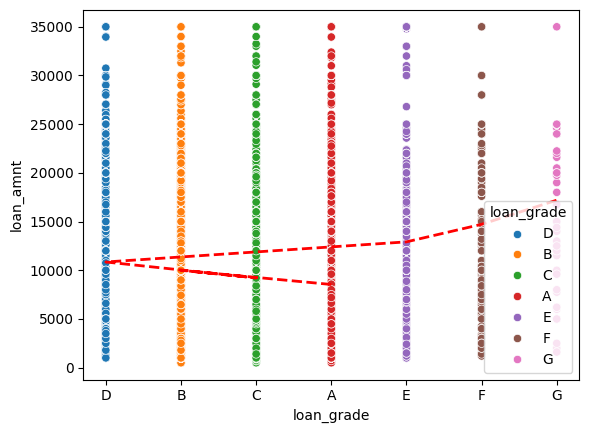

In [239]:
# Calculate group means
x = "loan_grade"
group_means = df.groupby(x)[Y].mean()

# Create the scatter plot here:
sns.scatterplot(x=x, y=Y, data=df, hue=x)

# # Add the additional line here:
plt.plot(group_means.index, group_means, color="red", linewidth=2, linestyle="--")

Now that we’ve seen what a regression model with a binary predictor looks like visually, we can actually fit the model using `statsmodels.api.OLS.from_formula()`, the same way we did for a quantitative predictor:

In [240]:
model = sm.OLS.from_formula(f"{Y} ~ {x} ", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loan_amnt   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     176.4
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          8.67e-222
Time:                        19:14:25   Log-Likelihood:            -3.3085e+05
No. Observations:               32581   AIC:                         6.617e+05
Df Residuals:                   32574   BIC:                         6.618e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8539.2735     59.939    142.467      0.000    8421.791    8656.756
loan_grade[T.B]  1456.2102     85.425     17.047      0.000    1288.775    1623.646
loan_grade[T.C]   674.5892     97.918      6.889      0.000     482.665     866.513
loan_grade[T.D]  2309.9681    119.459     19.337      0.000    2075.823    2544.113
loan_grade[T.E]  4376.5720    209.181     20.922      0.000    3966.570    4786.574
loan_grade[T.F]  6178.0502    405.276     15.244      0.000    5383.695    6972.406
loan_grade[T.G]  8656.4297    780.104     11.097      0.000    7127.397    1.02e+04
==============================================================================
Omnibus:                     5506.059   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9386.224
Skew:                           1.115   Prob(JB):                         0.00
Kurtosis:                       4.394   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that this will work if the `x` variable is coded with 0s and 1s, but it will also work if it is coded with Trues and Falses, or even if it is coded with strings like `'virginca'` and `'versicolor'` (in this case, the coefficient label will look something like `species[T.virginca]` in the params output, indicating that 'yes' corresponds to a 1).

To interpret this output, we first need to remember that the intercept is the expected value of the outcome variable when the predictor is equal to zero. In this case, the intercept is therefore the mean of `y`.

The slope is the expected difference in the outcome variable for a one unit difference in the predictor variable. In this case, a one unit difference in species is the difference between `'setosa'` and `'virginca'`. Therefore, the slope is the difference in mean.

There are a few different Python libraries that can be used to fit linear regression models. It is therefore important to understand how this implementation differs for each library. In `statsmodels`, the creation of the `X` matrix happens completely “behind the scenes” once we pass in a model formula.

In `scikit-learn` (another popular library for linear regression), we actually need to construct the indicator variables ourselves. Note that we do not have to construct the extra column of 1s that we saw in the X matrix — this also happens behind the scenes in `scikit-learn`. In order to construct those indicator variables, the pandas `get_dummies()` function is extremely useful:

## **Assumptions**

There are a number of assumptions of simple linear regression, which are important to check if you are fitting a linear model. 



### **Linear Relationship**

The first assumption is that the relationship between the outcome variable and predictor is linear (can be described by a line). We can check this before fitting the regression by simply looking at a plot of the two variables. Once we’ve calculated the fitted values and residuals for a model, we can check the normality and homoscedasticity assumptions of linear regression.



### **Normality of Residuals**

The normality assumption states that the residuals should be normally distributed. This assumption is made because, statistically, the residuals of any independent dataset will approach a normal distribution when the dataset is large enough. To check the normality assumption, we can inspect a histogram of the residuals and make sure that the distribution looks approximately normal (no skew or multiple “humps”):

<Axes: ylabel='Count'>

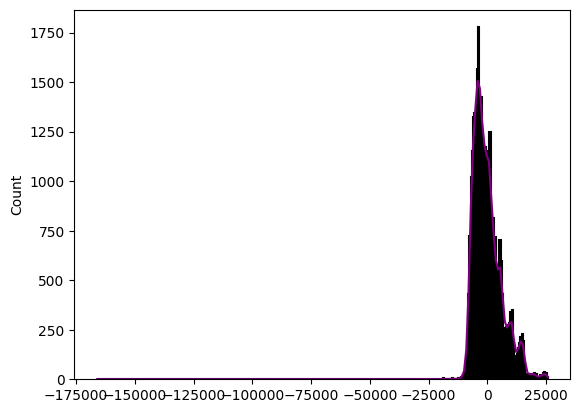

In [241]:
sns.histplot(residuals, kde=True, color="purple", linewidth=1.5, edgecolor="black")

### **Homoscedasticity**

Homoscedasticity is a fancy way of saying that the residuals have equal variation across all values of the predictor (independent) variable. When homoscedasticity is not met, this is called heteroscedasticity, meaning that the variation in the size of the error term differs across the independent variable. Since a linear regression seeks to minimize residuals and gives equal weight to all observations, heteroscedasticity can lead to bias in the results. A common way to check this is by plotting the residuals against the fitted values.

<Axes: xlabel='None', ylabel='None'>

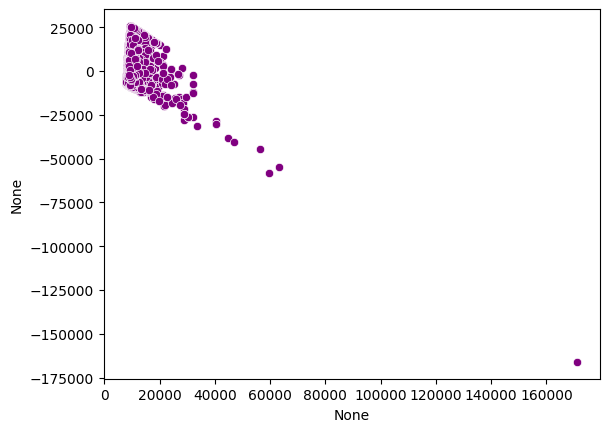

In [242]:
sns.scatterplot(x=fitted_values, y=residuals, color="purple")

If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around $y=0$. If there are any patterns or asymmetry, that would indicate the assumption is NOT met and linear regression may not be appropriate.

# **Multiple Linear Regression**

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable.

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [244]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [245]:
x_numeric_cols = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]
x_categorical_col = "loan_grade"

In [246]:
scaler = StandardScaler()

for vars in x_numeric_cols:
    df[f"{vars}_scaled"] = scaler.fit_transform(df[[vars]])

In [247]:
encoder = OneHotEncoder()

series = df[x_categorical_col]
df = pd.get_dummies(data=df, columns=[x_categorical_col], drop_first=True)
df[x_categorical_col] = series

In [248]:
target_variable = Y
transformed_feature_variables = [
    "person_age_scaled",
    "person_income_scaled",
    "loan_grade_B",
    "loan_grade_C",
    "loan_grade_D",
    "loan_grade_E",
    "loan_grade_F",
    "loan_grade_G",
]
y = df[[target_variable]]
X = df[transformed_feature_variables]

print(len(X))
X.head()

32581


,person_age_scaled,person_income_scaled,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-0.903374,-0.114143,False,False,True,False,False,False
1,-1.060904,-0.911147,True,False,False,False,False,False
2,-0.430783,-0.911147,False,True,False,False,False,False
3,-0.745843,-0.009274,False,True,False,False,False,False
4,-0.588313,-0.188358,False,True,False,False,False,False


In [249]:
# First, split into Train (80%) and Temp (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

26064 6517


## **Model Fitting**

### **sklearn.linear_model.LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# finds the coefficients and the intercept value
model.fit(X_train, y_train)

# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values.
y_predicted = model.predict(X_test)

In [251]:
y_predicted_df = pd.DataFrame(y_predicted, columns=["sepal_length_predicted"])
y_predicted_df.head()

,sepal_length_predicted
0,8999.174318
1,9178.123336
2,11271.111713
3,7574.144899
4,11945.240388


The `.fit()` method gives the model two variables that are useful to us:

- `.coef_`, which contains the coefficients
- `.intercept_`, which contains the intercept

After performing multiple linear regression, you can print the coefficients using `.coef_`.

Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.

In [252]:
coefficients_df = pd.DataFrame(
    {"Feature": model.feature_names_in_, "Coefficient": model.coef_.flatten()}
)
coefficients_df

,Feature,Coefficient
0,person_age_scaled,-12.119794
1,person_income_scaled,1599.095771
2,loan_grade_B,1426.835458
3,loan_grade_C,682.737834
4,loan_grade_D,2567.422674
5,loan_grade_E,3958.668700
6,loan_grade_F,5638.670988
7,loan_grade_G,8071.279218


<Axes: ylabel='Count'>

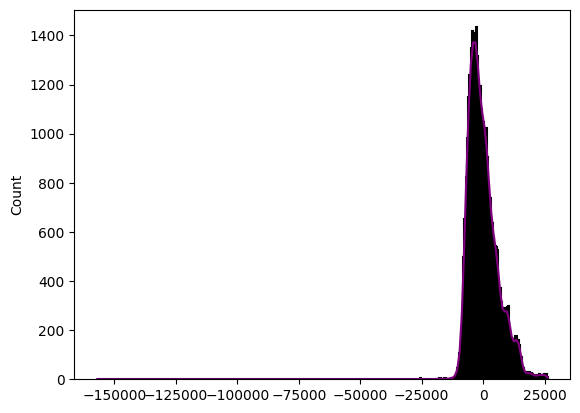

In [253]:
fitted_values = model.predict(df[transformed_feature_variables])
fitted_values_df = pd.DataFrame(fitted_values, columns=["fitted_values"])
residuals = df[target_variable] - fitted_values_df["fitted_values"]
sns.histplot(residuals, kde=True, color="purple", linewidth=1.5, edgecolor="black")

<Axes: xlabel='fitted_values', ylabel='None'>

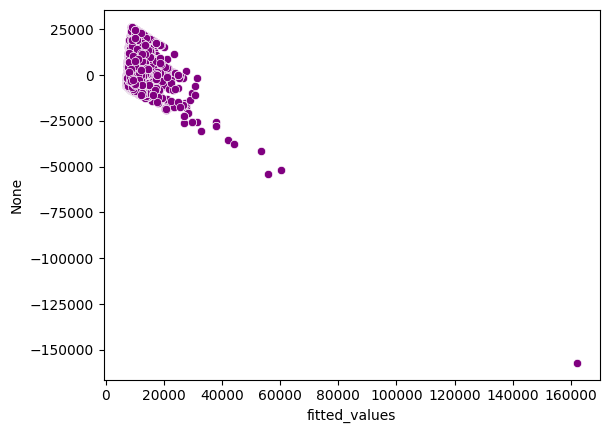

In [254]:
sns.scatterplot(x=fitted_values_df["fitted_values"], y=residuals, color="purple")

### **statsmodels.api.OLS**

Alternatively, you can use statsmodels package.

In [255]:
features_plus_string = " + ".join(transformed_feature_variables)
ols = sm.OLS.from_formula(f"{target_variable} ~ {features_plus_string}", data=df)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loan_amnt   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     461.6
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:14:27   Log-Likelihood:            -3.2962e+05
No. Observations:               32581   AIC:                         6.593e+05
Df Residuals:                   32572   BIC:                         6.593e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             8526.1527     57.725    147.704      0.000    8413.010    8639.295
loan_grade_B[T.True]  1461.9096     82.266     17.770      0.000    1300.665    1623.154
loan_grade_C[T.True]   718.6592     94.306      7.621      0.000     533.816     903.502
loan_grade_D[T.True]  2387.8007    115.061     20.752      0.000    2162.276    2613.325
loan_grade_E[T.True]  4259.6968    201.460     21.144      0.000    3864.827    4654.566
loan_grade_F[T.True]  5894.0331    390.339     15.100      0.000    5128.954    6659.112
loan_grade_G[T.True]  8378.5247    751.285     11.152      0.000    6905.979    9851.071
person_age_scaled       18.4983     33.712      0.549      0.583     -47.578      84.575
person_income_scaled  1674.2097     33.720     49.650      0.000    1608.117    1740.302
==============================================================================
Omnibus:                     8128.472   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508960.950
Skew:                           0.244   Prob(JB):                         0.00
Kurtosis:                      22.357   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **sklearn.linear_model.SDGRegressor**

Scikit-learn’s SGDRegressor model uses a variant of gradient descent called stochastic gradient descent (or SGD for short). SGD is very similar to gradient descent, but instead of using the actual gradient it uses an approximation of the gradient that is more efficient to compute. This model is also sophisticated enough to adjust the learning rate as the SGD algorithm iterates, so in many cases you won’t have to worry about setting the learning rate.

SGDRegressor also uses a technique called regularization that encourages the model to find smaller parameters. Regularization is beyond the scope of this article, but it’s important to note that the use of regularization can sometimes result in finding different coefficients than OLS would have.

If your data set is simply too large for your computer to handle OLS, you can use SGDRegressor. It will not find the exact optimal parameters, but it will get close enough for all practical purposes and it will do so without using too much computing power. Here’s an example.

```python
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor

# Import the data set
X, y = load_diabetes(return_X_y=True)

# Create the SGD linear regression model
# max_iter is the maximum number of iterations of SGD to try before halting
sgd = SGDRegressor(max_iter = 10000)

# Fit the model to the data
sgd.fit(X, y)

# Print the coefficients of the model
print(sgd.coef_)
```

# **Logistic Regression**

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group. For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups.




## **Logit Link Function**

We saw that predicted outcomes from a linear regression model range from negative to positive infinity. These predictions don’t really make sense for a classification problem. Step in logistic regression! To build a logistic regression model, we apply a logit link function to the left-hand side of our linear regression function.

$\ln(\Large\frac{y}{1-y})$ $=b_0+b_1x_1+...+b_nx_n$

![image](images/logistic-curve.png)

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called log-odds because it is the natural logarithm (ln) of odds (p/(1-p)). 

Odds $=(\Large\frac{p}{1-p})$ $=\large e^{b_0+b_1x_1+...+b_nx_n}$

In [256]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_age_scaled',
       'person_income_scaled', 'person_emp_length_scaled',
       'loan_int_rate_scaled', 'loan_percent_income_scaled',
       'cb_person_cred_hist_length_scaled', 'loan_grade_B', 'loan_grade_C',
       'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'loan_grade'],
      dtype='object')

In [257]:
target_variable = "loan_status"
transformed_feature_variables = [
    "person_age_scaled",
    "person_income_scaled",
    "loan_grade_B",
    "loan_grade_C",
    "loan_grade_D",
    "loan_grade_E",
    "loan_grade_F",
    "loan_grade_G",
]
y = df[[target_variable]]
X = df[transformed_feature_variables]

print(len(X))
X.head()

32581


,person_age_scaled,person_income_scaled,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-0.903374,-0.114143,False,False,True,False,False,False
1,-1.060904,-0.911147,True,False,False,False,False,False
2,-0.430783,-0.911147,False,True,False,False,False,False
3,-0.745843,-0.009274,False,True,False,False,False,False
4,-0.588313,-0.188358,False,True,False,False,False,False


In [258]:
# First, split into Train (80%) and Temp (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

26064 6517


## **Model Fitting**


### **sklearn.linear_model.LogisticRegression**

One important note is that sklearn‘s logistic regression implementation requires the features to be standardized because regularization is implemented by default.

In [259]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# finds the coefficients and the intercept value
log_reg.fit(X_train, np.ravel(y_train))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


- Large positive coefficient: a one unit increase in that feature is associated with a large increase in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as 1)
- Large negative coefficient: a one unit increase in that feature is associated with a large decrease in the log odds/probability of belonging to the positive class.
- Coefficient of 0: The feature is not associated with the outcome.

In [260]:
coefficients_df = pd.DataFrame(
    {"Feature": log_reg.feature_names_in_, "Coefficient": log_reg.coef_.flatten()}
)
coefficients_df

,Feature,Coefficient
0,person_age_scaled,-0.004387
1,person_income_scaled,-1.477750
2,loan_grade_B,0.533702
3,loan_grade_C,0.789159
4,loan_grade_D,2.690574
5,loan_grade_E,3.011319
6,loan_grade_F,3.551138
7,loan_grade_G,4.967855


C:\Users\mervedosa\AppData\Local\Temp\ipykernel_4380\2020322580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Coefficient', ylabel='Feature'>

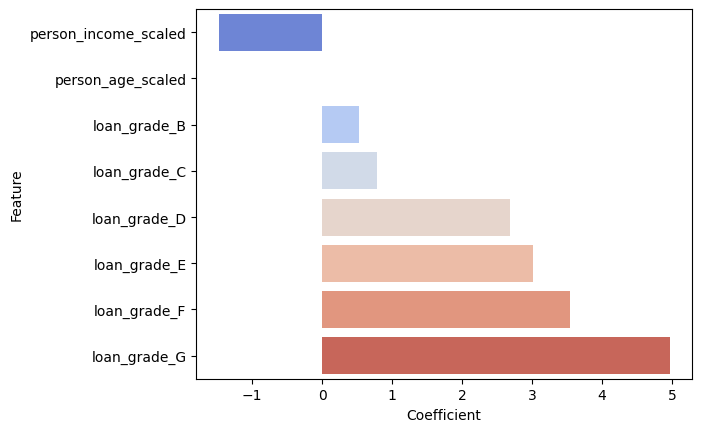

In [261]:
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coefficients_df.sort_values("Coefficient"),
    palette="coolwarm",
)

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as 1) using the `predict()`method. The input is a matrix of features and the output is a vector of predicted labels, 1 or 0.

In [262]:
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values.
y_predicted = log_reg.predict(X_test)
y_predicted

array([0, 0, 1, ..., 0, 0, 0], shape=(6517,))

If we are more interested in the predicted probability of group membership, we can use the `.predict_proba()` method. The input to `predict_proba()` is also a matrix of features and the output is an array of probabilities, ranging from 0 to 1:

In [263]:
y_predicted_probs = log_reg.predict_proba(X_test)[:, 1]
y_predicted_probs

array([0.27338946, 0.17045523, 0.53219771, ..., 0.04621322, 0.03813339,
       0.11616232], shape=(6517,))

As we’ve seen, logistic regression is used to predict the probability of group membership. Once we have this probability, we need to make a decision about what class a datapoint belongs to. This is where the classification threshold comes in!

By default, `.predict_proba()` returns the probability of class membership for both possible groups. In the example code above, we’ve only printed out the probability of belonging to the positive class. Notice that datapoints with predicted probabilities greater than 0.5 (the second and third datapoints in this example) were classified as 1s by the `.predict()` method. This is a process known as thresholding. As we can see here, sklearn sets the default classification `threshold` probability as 0.5.

In [264]:
threshold = 0.6

y_pred_class = (y_predicted_probs > threshold) * 1.0
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.], shape=(6517,))

If we want to find the threshold that best maximises FPR and TPR is done as so:

In [ ]:
from sklearn.metrics import roc_curve

# Print optimal threshold value
f = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

fpr = f[0]
tpr = f[1]
thresholds = f[2]
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

Optimal threshold: 0.203624203922761


## **Assumptions**

We’re going to begin with the primary assumptions about the data that need to be checked before implementing a logistic regression model.

### **Binary Target**

One of the most basic assumptions of logistic regression is that the outcome variable needs to be binary, which means there are two possible outcomes. Multinomial logistic regression is an exception to this assumption and is beyond the scope of this lesson.


In [266]:
print(df.loan_status.value_counts())

loan_status
0    25473
1     7108
Name: count, dtype: int64



### **Independent Observations**

While often overlooked, checking for independent observations in a data set is important for logistic regression. This can be violated if, in this case, patients are biopsied multiple times (repeated sampling of the same individual).


In [267]:
unique_ids = df.index.nunique() == df.shape[0]
print(unique_ids)

True



### **Large Enough Sample**

Since logistic regression is fit using maximum likelihood estimation instead of least squares minimization, there must be a large enough sample to get convergence. When a model fails to converge, this causes the estimates to be extremely inaccurate. Now, what does a “large enough” sample mean? Often a rule of thumb is that there should be at least 10 samples per feature for the smallest class in the outcome variable.

For example, if there were 100 samples and the outcome variable diagnosis had 60 benign tumors and 40 malignant tumors, then the max number of features allowed would be 4. To get 4 we took the smallest of the classes in the outcome variable, 40, and divided it by 10.


In [268]:
max_features = min(df.loan_status.value_counts() / 10)
print(X_train.shape[1])
print(max_features)

8
710.8



### **No Influencial Outliers**

Logistic regression is sensitive to outliers, so we must remove any extremely influential outliers for model building. Outliers are a broad topic with many different definitions – z-scores, scaler of the interquartile range, Cook’s distance/influence/leverage, etc – so there are many ways to identify them. But here, we will use visual tools to rule out obvious outliers.

c:\Users\mervedosa\OneDrive - Deloitte (O365D)\Documents\Deloitte\Non-Billable\Azure\crm_codelib\UK SRTA CRM Credit Library\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<Axes: >

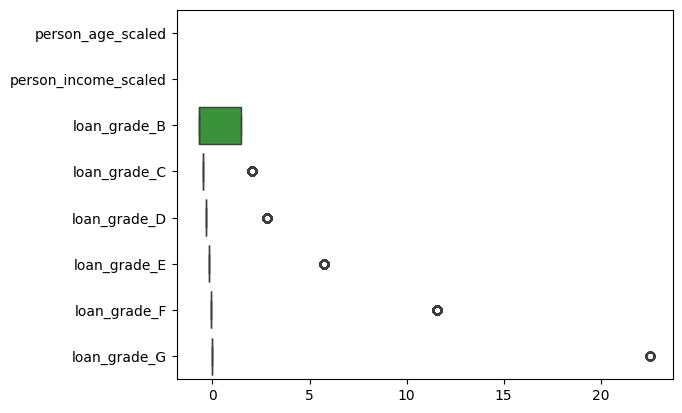

In [269]:
from scipy.stats import zscore

sns.boxplot(data=np.log(df[transformed_feature_variables] + 0.01).apply(zscore), orient="h")

### **Features Linearly Related to Log-odds**
Similar to linear regression, the underlying assumption of logistic regression is that the features are linearly related to the logit of the outcome. To test this visually, we can use Seaborn’s `regplot`, with the parameter `logistic= True` and the x value as our feature of interest. If this condition is met, the fit model will resemble a sigmoidal curve (as is the case when x=radius_mean).


<Axes: xlabel='loan_grade_G', ylabel='loan_status'>

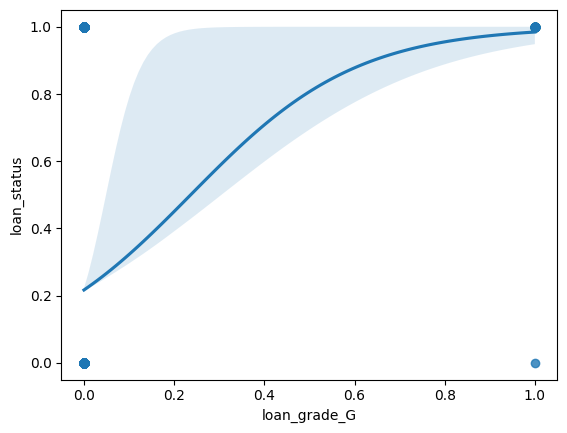

In [270]:
sns.regplot(
    x="loan_grade_G",
    y="loan_status",
    data=df,
    logistic=True,
)


### **Multicollinearity**

Like in linear regression, one of the assumptions is that there is no multicollinearity in the data. Meaning the features should not be highly correlated. Multicollinearity can cause the coefficients and p-values to be inaccurate. With a correlation plot, we can see which features are highly correlated and then we can drop one of the features.

We’re going to look at the “mean” features which are highly correlated with each other using a heatmap correlation plot.

<Axes: >

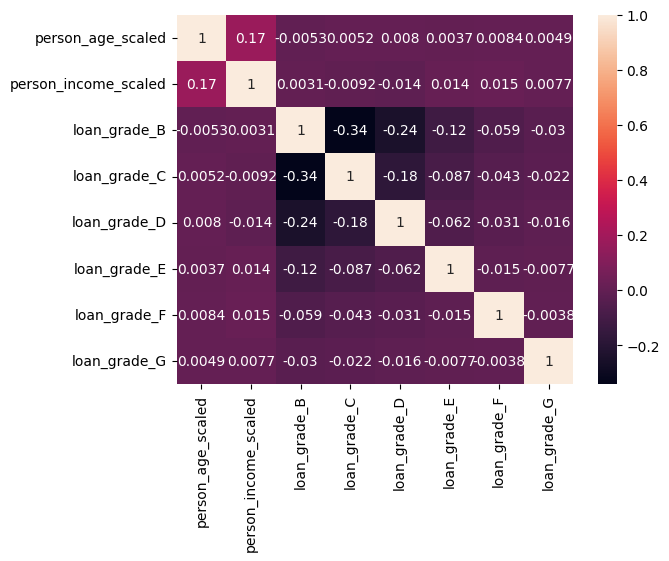

In [271]:
sns.heatmap(df[transformed_feature_variables].corr(), annot=True)

### **Class Imbalance**

Class imbalance is when your binary classes for the outcome variable are not evenly split. Technically, anything different from a 50/50 distribution would be imbalanced and need appropriate care. In the case of rare events, sometimes the positive class can be less than 1% of the total. If your classes are significantly imbalanced, this could create a bias towards the majority class since the model learns that it can have a higher accuracy if it predicts the majority class more often.



#### **Positivity Rate**

We can use the positivity rate to tell us how balanced our classes are. The positivity rate is the rate of occurrence for the positive class. With our breast cancer data, the formula is Positivity Rate = Total Malignant Cases / Total Cases. If our positivity rate is close to .5, then our classes are balanced.


In [272]:
sum(y_train.values)

array([5663])

In [273]:
print("Train positivity rate: ")
print(sum(y_train["loan_status"]) / y_train.shape[0])
print("Test positivity rate: ")
print(sum(y_test["loan_status"]) / y_test.shape[0])

Train positivity rate: 
0.21727286678944138
Test positivity rate: 
0.22172778885990485



#### **Stratification**
If your classes are imbalanced (more likely to happen with smaller datasets) then this difference can become even greater after you split your data into a training and testing dataset. One way to mitigate this is to randomly split using stratification on the class labels. Stratification is when the data is sorted into subgroups to ensure a nearly equal class distribution in your train and test sets. After using stratification, the training and testing datasets should have a very similar positivity rate (but stratification does not necessarily cause the positivity rate of the dataset to reach closer to .5).


In [274]:
# First, split into Train (80%) and Temp (20%)
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [275]:
print("Stratified train positivity rate: ")
str_train_positivity_rate = sum(y_train_str.values) / y_train_str.shape[0]
print(str_train_positivity_rate)

print("Stratified test positivity rate: ")
str_test_positivity_rate = sum(y_test_str.values) / y_test_str.shape[0]
print(str_test_positivity_rate)

Stratified train positivity rate: 
[0.21814435]
Stratified test positivity rate: 
[0.21820972]



#### **Undersampling/Oversampling**

To bring the positivity rate of the dataset closer to .5, we can undersample the majority class or oversample the minority class. For oversampling, repeated samples (with replacement) are taken from the minority class until the size is equal to that of the majority class. This causes the same data to be used multiple times, giving a higher weight to these samples. Alternatively, undersampling leaves out some of the majority class data to have the same number of samples as the minority class, leaving fewer data to build the model. We will not be practicing undersampling/oversampling in this exercise even though it can be a useful way to balance the classes.



#### **Balance the Class Weight**

When training a model, it is the default for every sample to be weighted equally. However, in the case of class imbalance, this can result in poor predictive power for the smaller of the two classes. A way to counteract this in logistic regression is to use the parameter `class_weight='balanced'`. This applies a weight inversely proportional to the class frequency, therefore supplying higher weight to misclassified instances in the smaller class. While overall accuracy may not increase, this can increase the accuracy for the smaller class (e.g. increase the number of malignant cases correctly diagnosed).

Keep in mind that we want the recall score (also known as the True Positive Rate) to be as high as we can get it for our breast cancer data.

In [276]:
log_reg_bal = LogisticRegression(class_weight="balanced")

# **Generalised Linear Models** 

Generalized Linear Models (GLMs) extend linear regression by allowing the dependent variable (Y) to follow different distributions from the exponential family (e.g., Normal, Poisson, Binomial). GLMs consist of:

1. A linear predictor $\eta=X\beta$ where 𝑋 is the matrix of independent variables and 𝛽 is the coefficient vector.
2. A link function $g(⋅)$ that transforms the expectation of $Y$ into a linear form e.g. $\log(Y)=\eta$
3. A distribution from the exponential family (Normal, Poisson, Gamma, etc.).

Common GLMs:
- Linear Regression: Identity link function, Normal distribution.
- Logistic Regression: Logit link function, Binomial distribution.
- Poisson Regression: Log link function, Poisson distribution (used for count data).
- Negative Binomial: Log link function, overdispersed count similar to Poisson but handles variance > mean (e.g., accident counts)
- Gamma Regression: Inverse, continuous (>0) data, modeling skewed data (e.g., insurance claims, waiting times)

GLMs require assumptions about distributions (Normal, Poisson, etc.), while ML models (e.g., Random Forests, Neural Networks) learn from patterns in the data. GLMs are interpretable (coefficients have real-world meaning), whereas ML models often act as black boxes. GLMs assume independence of observations, while time series models (e.g., ARIMA, SARIMA) explicitly model temporal dependence.

![image](images/glm_vs_ml.png)

![image](images/glm_vs_time_series.png)

## **Binomial Distribution (Logistic Regression)**

Use when the outcome is binary (success/failure) and you want to model the number or probability of successes in a fixed number of trials. 

Examples
- Predicting if a user will click an ad (yes/no). 

Assumptions
- Fixed number of trials
- Each trial is independent
- Constant probability of success

In [277]:
for col in transformed_feature_variables:
    if type(X_train[col].values[0]) == np.bool:
        X_train[col] = X_train[col].astype(int)
        X_test[col] = X_test[col].astype(int)

In [278]:
# Add intercept term for GLM
X_train_glm = sm.add_constant(X_train.values)
X_test_glm = sm.add_constant(X_test)

In [ ]:
model = sm.GLM(y_train, X_train_glm, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:                26064
Model:                            GLM   Df Residuals:                    26055
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10849.
Date:                Tue, 24 Jun 2025   Deviance:                       21697.
Time:                        19:16:10   Pearson chi2:                 1.07e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1930
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4510      0.038    -63.703      0.0

## **Beta Distribution**

Proportions or percentages (values between 0 and 1). It's particularly useful when the proportions are not clustered near 0 or 1.

Examples:

- Market share of a product.
- Proportion of defective items in a batch.
- Conversion rates (e.g., percentage of website visitors who make a purchase).

Assumptions:

- The data are proportions or percentages, ranging from 0 to 1.
- The data are not concentrated near 0 or 1. If the data are clustered near the boundaries, transformations might be necessary.
- Remember that the choice of distribution should be guided by the characteristics of your data and the underlying process generating the data. Visual inspection of histograms and other descriptive statistics is crucial before selecting a GLM.




## **Poisson Distribution**

Use for modeling count data where the event rate is constant and the events happen independently.

Examples:
- Number of customer complaints per day

Assumptions:
- Events are independent
- Mean equals the variance (equidispersion)
- Counts are non-negative integers

```python
model = sm.GLM(y, X, family=sm.families.Poisson())
result = model.fit()
print(result.summary())
```

## **Negative Binomial Distribution**

Use when modeling count data with overdispersion (i.e., variance > mean). It's a generalization of the Poisson model.

Examples:
- Overdispersed counts of claims or visits

Assumptions:
- Like Poisson but allows for extra variability
- Dispersion is modeled separately

```python
from statsmodels.discrete.discrete_model import NegativeBinomial

model = NegativeBinomial(y, X)
result = model.fit()
print(result.summary())

model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
result = model.fit()
print(result.summary())
```

## **Zero-Inflated Poisson (ZIP) Distribution**

Count data with an excess of zeros compared to a standard Poisson distribution. This means you observe many more zero counts than a typical Poisson model would predict.

Examples:

- Number of accidents per driver (many drivers have zero accidents).
- Number of hospital visits per patient (many patients have zero visits).
- Number of purchases per customer (many customers make zero purchases).

Assumptions:

- The data are counts (non-negative integers).
- There are two processes generating the data: a process that determines whether a count is zero or positive, and a separate process that generates the positive counts (often modeled using a Poisson distribution).
- The positive counts follow a Poisson distribution (or a different distribution if a Zero-Inflated Negative Binomial is more appropriate).



## **Zero-Inflated Negative Binomial (ZINB) Distribution**

Count data with an excess of zeros and overdispersion (variance greater than the mean). This is a common scenario when the data exhibit both extra zeros and more variability than a Poisson distribution can account for.

Examples:

- Number of claims filed by an insurance policyholder.
- Number of defects in a manufacturing process.
- Number of species observed in an ecological survey.

Assumptions:

- The data are counts (non-negative integers).
- There are two processes generating the data: a process determining whether a count is zero or positive, and a separate process generating the positive counts (often modeled using a Negative Binomial distribution).
- The positive counts follow a Negative Binomial distribution (which accounts for overdispersion).


## **Tweedie Distribution**

For data that are a mix of discrete (often 0s) and continuous positive values. Used in insurance and advertising (zero-inflated spend).

Examples:
- Insurance claim amounts
- Marketing spend data (many 0s and positive skew)

Assumptions:
- A compound Poisson-Gamma model
- Flexible variance structure: $\sigma^2 = φ  μ^p$

A Gamma Regression assumes that its power parameter $p=2$ whereas a Tweedie allows the following $1<p<2$ . This parameter describes how the variance increases with the mean.

```python
tweedie_family = sm.families.Tweedie(var_power=1.5, link=sm.families.links.log())
model = sm.GLM(y, X, family=tweedie_family)
result = model.fit()
print(result.summary())
```

## **Gamma Distribution**

When modeling continuous, skewed strictly positive data, such as duration or cost, where variance increases with the mean.

Examples:
- Insurance claim sizes
- Time until failure

Assumptions:
- Positive continuous values
- Variance increases with the square of the mean

## **Inverse Gaussian Distribution**

Continuous, positive data with a heavier right tail than the Gamma distribution. This means there's a higher probability of observing very large values compared to a Gamma distribution.

Examples:

- Time to repair a machine.
- Length of hospital stays.
- Waiting times in a queue.

Assumptions:

- The data are continuous and positive.
- The distribution is right-skewed, with a heavier tail than the Gamma distribution.



## **Generalized Gamma Distribution**

Flexible modeling of continuous, positive data. It can accommodate various shapes of distributions, including those that are symmetric, right-skewed, or even left-skewed (though less common for positive data). It's a generalization of several other distributions (Gamma, Weibull, Exponential).

Examples:

- Modeling data where the shape is uncertain or varies across subgroups.
- Situations where other distributions (Gamma, Weibull) don't provide a good fit.

Assumptions:

- The data are continuous and positive.
- The shape of the distribution is flexible and can be estimated from the data. This flexibility comes at the cost of potentially more complex estimation.


## **Lognormal Distribution (Lognormal Regression)**

Use when the outcome variable is always positive and right-skewed. This distribution models the logarithm of the outcome variable as normally distributed.

Examples:

- Modeling income levels (always positive and often right-skewed).
- Predicting the lifespan of a machine (positive and often right-skewed).
- Modeling stock prices (positive and often right-skewed).

Assumptions:

- The outcome variable is always positive (Y > 0).
- The logarithm of the outcome variable, log(Y), is approximately normally distributed. This means that after a log transformation, the data should roughly follow a bell curve.
- The errors in the model applied to log(Y) are independent and identically distributed (i.i.d.). This is a standard assumption for many regression models. 

Important Note: In a lognormal regression, you typically model the logarithm of the response variable as a linear function of the predictor variables. The coefficients are then interpreted on the log scale, and back-transformation is needed to obtain predictions and interpretations on the original scale. This back-transformation often involves exponentiation.

# **Parameter Estimation Methods**

Maximum Likelihood Estimation (MLE) and Ordinary Least Squares (OLS), including Weighted OLS (WOLS), are all methods used to estimate the parameters of a statistical model, but they differ in their approaches and assumptions.

## **Ordinary Least Squares (OLS)**

In OLS, we minimize the sum of squared residuals:

$\min_\beta\displaystyle\sum_{i=1}^{n}(y_i-X_i\beta)^2$

Advantages: Relatively simple to compute and interpret. Efficient under its assumptions.

Disadvantages: Sensitive to outliers and violations of its assumptions. Can produce biased and inefficient estimates if assumptions are violated.

## **Weighted Least Squares (WLS)**

Weighting a model with a variable means assigning different importance (or reliability) to each observation during model fitting. This is particularly valuable when certain data points are more representative, come from more precise measurements, or are aggregated values (e.g., a row represents 100 people rather than 1). In regression models, weighting can ensure the model fits more accurately to influential or higher-confidence data points, which might otherwise be underrepresented in an unweighted model.

Why would you use weights?
- Unequal Importance: Some observations may carry more importance due to sampling design, frequency, or relevance. For instance, in survey data, weights correct for stratified or oversampled populations.
- Aggregation: When data is aggregated (e.g., one row = 1,000 customers), weighting by the count ensures the model reflects the total population, not just the number of rows.
- Heteroscedasticity: In linear models, if the variance of errors differs across observations (non-constant variance), weighted least squares (WLS) can reduce bias and improve efficiency.
- Bias Correction: If certain groups are over- or under-represented, weights can adjust to better reflect the target population.

In WLS, each observation is given a weight and we instead minimize the weighted sum of squared residuals:

$\min_\beta\displaystyle\sum_{i=1}^{n}w_i\cdot(y_i-X_i\beta)^2$

In OLS, each residual is treated equally. In WLS, the model penalizes errors more or less based on the associated weight:
- High weight → Model must explain that observation well.
- Low weight → Model is “allowed” to fit it poorly.

Advantages: More robust to heteroscedasticity than OLS. Produces more efficient estimates when heteroscedasticity is present.

Disadvantages: Requires knowledge or estimation of the error variances. Can be more complex to implement than OLS.

## **Maximum Likelihood Estimation (MLE)**

The likelihood function is a crucial concept in statistics and machine learning, particularly in the context of parameter estimation for GLMs. It's a function that describes the probability of observing the data you have, given a specific set of parameter values for your statistical model. Let's break it down:

Imagine you have a statistical model (e.g., a linear regression, a probability distribution like a normal distribution) with some unknown parameters (e.g., the slope and intercept in linear regression, the mean and standard deviation in a normal distribution). You collect some data. The likelihood function quantifies how likely it is that you would have observed your data if the model's parameters had specific values.

Let's say:
- $θ$ (theta) represents the vector of unknown parameters in your model.
- $X$ represents your observed data.

The likelihood function, denoted as $L(θ|X)$, is a function of the parameters $θ$, given the observed data $X$. It's defined as the probability (or probability density) of observing the data $X$, given the parameters $θ$:

$L(\theta|X) = P(X|\theta)$

Let's say you have a sample of data that you believe follows a normal distribution with an unknown mean ($μ$) and standard deviation ($σ$). Your observed data is $X = {x₁, x₂, ..., xₙ}$. The likelihood function for this scenario would be:

$L(\mu, \sigma|X) = \prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$

This equation calculates the probability density of observing each data point xᵢ given the mean μ and standard deviation σ, and then multiplies these probabilities together (assuming independence of observations). The goal of maximum likelihood estimation (MLE) is to find the values of μ and σ that maximize this likelihood function.

Advantages: Generally consistent, asymptotically efficient, and asymptotically normal (under certain regularity conditions). Can be applied to a wide range of models.

Disadvantages: Can be computationally intensive. May not always yield a closed-form solution. Can be sensitive to the choice of starting values for iterative methods. May produce biased estimates in small samples.

## **Log-Likelihood Function**

Because likelihood functions often involve products of probabilities, which can lead to very small numbers that cause computational issues, it's often more convenient to work with the log-likelihood function:

$\ell(\theta|X) = \log L(\theta|X)$ 

Maximizing the log-likelihood function is equivalent to maximizing the likelihood function because the logarithm is a monotonically increasing function.

## **Weighted Log-Likelihoods**

When using weights, we maximize a weighted log-likelihood:

$\ell_w(\theta|X) = \displaystyle\sum_{i=1}^{n}w_i\cdot\log L(\theta|X)$ 

Weights here can reflect:

- Frequency weights (e.g. 1 row = 10 obs)
- Importance weights (e.g. higher confidence in some rows)

## **statsmodels.api**

```python
import statsmodels.api as sm

# Weighted Linear Regression
model = sm.WLS(y, X, weights=weights_array)
results = model.fit()

# Weighted GLM
glm_model = sm.GLM(y, X, family=sm.families.Poisson(), weights=weights_array)
glm_results = glm_model.fit()

```

The model accounts for weights during likelihood estimation or residual minimization, often leading to more realistic estimates when data quality or representation is uneven.

## **sklearn**

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y, sample_weight=weights_array)
```

This is available in models such as:
- LinearRegression
- LogisticRegression
- Tree-based models (DecisionTreeClassifier, RandomForestRegressor, etc.)
- SGDRegressor, GradientBoosting, etc.

## **Example: Normal Distribution**

Let's illustrate the application of OLS and MLE to a linear regression model predicting ice cream sales ($Y$) based on temperature ($X$). We'll keep the example relatively simple for clarity. We assume a simple linear relationship:

$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $

Where:

- $Yᵢ$ is the ice cream sales on day i.
- $Xᵢ$ is the temperature on day i.
- $β₀$ is the y-intercept (sales when temperature is 0).
- $β₁$ is the slope (change in sales per unit change in temperature).
- $εᵢ$ is the error term (random variation not explained by temperature).

### **Ordinary Least Squares (OLS)**

OLS aims to find the values of $β₀$ and $β₁$ that minimize the sum of squared errors:

$\displaystyle\sum_{i=1}^{n} \epsilon_i^2 = \displaystyle\sum_{i=1}^{n} (Y_i - (\beta_0 + \beta_1 X_i))^2$ 

This is done using linear algebra; the solution involves calculating the means and variances of X and Y, and their covariance. The formulas for the OLS estimators are:

$\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2} $

$\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}$ 

Where:

$\hat{\beta}_0$ and $\hat{\beta}_1$ are the OLS estimates of the intercept and slope.
$\bar{X}$ and $\bar{Y}$ are the sample means of X and Y.

### **Maximum Likelihood Estimation (MLE)**

To use MLE, we need to make an assumption about the distribution of the error term, $εᵢ$. A common assumption is that the errors are normally distributed with a mean of 0 and a constant variance ($σ²$):

$\epsilon_i \sim N(0, \sigma^2) $

This implies that $Yᵢ$ is also normally distributed:

$Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma^2)$ 

The likelihood function is the product of the probability density functions of each Yᵢ:

$L(\beta_0, \beta_1, \sigma^2 | X, Y) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(Y_i - (\beta_0 + \beta_1 X_i))^2}{2\sigma^2}\right) $

To maximize this likelihood function, we typically work with the log-likelihood function (for computational ease):

$\ell(\beta_0, \beta_1, \sigma^2 | X, Y) = \log L(\beta_0, \beta_1, \sigma^2 | X, Y) = -\frac{n}{2} \log(2\pi) - n \log(\sigma) - \frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i - (\beta_0 + \beta_1 X_i))^2 $

Maximizing this log-likelihood function with respect to β₀, β₁, and σ² will lead to the MLE estimates. It turns out that, under the assumption of normally distributed errors, the MLE estimates for β₀ and β₁ are identical to the OLS estimates. The MLE estimate for σ² is slightly different from the OLS estimate of the variance of the residuals.

For this linear regression example with normally distributed errors, OLS and MLE yield the same estimates for the regression coefficients (β₀ and β₁). The difference lies primarily in the underlying assumptions and the approach to estimation (minimizing squared errors vs. maximizing likelihood). The choice between them might become more relevant if the error distribution were not normal, or if you were working with a more complex model.

## **Example: Y is Skewed**

If we knew that the ice cream sales (Y) had a skewed distribution, the simple linear regression model with the assumption of normally distributed errors would be inappropriate. Here's how the example would change:

1. OLS is no longer optimal:

    The OLS method relies on the assumption of normally distributed errors. If Y is skewed, the errors will likely also be skewed, violating this assumption. Consequently, OLS estimates might be inefficient (not the best possible estimates) and potentially biased. The standard errors of the OLS estimates would also be unreliable.

2. MLE with a different error distribution:

    To use MLE appropriately, we'd need to choose a different error distribution that better reflects the skewed nature of Y. Several options exist, depending on the type of skewness:
    - Gamma distribution: If Y is strictly positive and right-skewed (a common scenario for sales data), the gamma distribution is a suitable candidate. The likelihood function would then be based on the gamma probability density function.
    - Log-normal distribution: If the logarithm of Y is approximately normally distributed, a log-normal distribution would be appropriate. You would model log(Y) instead of Y directly.
    - Other skewed distributions: Other distributions like Weibull, or even transformations of the normal distribution (e.g., using a Box-Cox transformation), could be considered depending on the specific shape of the skewness.

3. Modified Likelihood Function:

    The likelihood function would change to reflect the chosen distribution. For example, if we used the gamma distribution, the likelihood function would be the product of gamma probability density functions for each Yᵢ, with parameters that depend on β₀, β₁, and the shape and scale parameters of the gamma distribution. Maximizing this likelihood function would provide MLE estimates for the regression coefficients and the gamma distribution parameters.

4. Interpretation of Coefficients:

    The interpretation of the regression coefficients (β₀ and β₁) would remain largely the same, but their values would likely differ from the OLS estimates.

## **Example: X is Skewed**

The skewness of the predictor variable (X) doesn't directly violate the assumptions of OLS or MLE in the same way that the skewness of the response variable (Y) does. OLS and MLE don't require X to be normally distributed. 

As discussed previously, the skewness of Y directly violates the assumption of normally distributed errors in OLS and requires a different approach for MLE (using a distribution that accounts for the skewness). This is a more fundamental issue than the skewness of X.

If both X and Y are skewed, you should address the skewness of Y first. This is because the skewness of Y directly affects the validity of the model's assumptions. Once you've chosen a suitable distribution for Y (e.g., Gamma, Log-normal), you can then consider transformations of X if a linear relationship doesn't seem appropriate based on the data and the chosen model for Y. The decision to transform X should be based on the data and the chosen model for Y. It's a modelling choice, not a direct response to a violated assumption.

# **Extra Reading**

https://medium.com/data-science/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd

https://medium.com/@sahin.samia/a-comprehensive-introduction-to-generalized-linear-models-fd773d460c1d

https://abhic159.medium.com/generalized-linear-models-glms-7b6e6c475d82

https://towardsdatascience.com/an-introduction-to-the-generalized-linear-model-glm-e32602ce6a92/

https://python.plainenglish.io/an-overview-of-generalized-linear-models-98db0c730e65